In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

<h2>Reading Pre Processed CSV file</h2>

In [2]:
df = pd.read_csv('/content/Jayappa_pp.csv')
df.head(10)

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,2017 Maruti Baleno 1.2 Alpha,5.45,2017,1197.0,Third Party insurance,Manual,40000.0,First Owner,Petrol,83.10,5.0,21.40,Hatchback,Agra
1,2018 Tata Hexa XTA,10.00,2018,1949.5,Third Party insurance,Automatic,70000.0,First Owner,Diesel,153.86,5.0,17.60,MUV,Agra
2,2015 Maruti Swift Dzire VXI,4.50,2015,1197.0,Third Party insurance,Manual,70000.0,Second Owner,Petrol,83.14,5.0,20.85,Sedan,Agra
3,2015 Maruti Swift Dzire VXI,4.50,2015,1197.0,Third Party insurance,Manual,70000.0,Second Owner,Petrol,83.14,5.0,20.85,Sedan,Agra
4,2009 Hyundai i10 Magna 1.1,1.60,2009,1086.0,Third Party insurance,Manual,80000.0,First Owner,Petrol,68.05,5.0,19.81,Hatchback,Agra
5,2015 Hyundai i20 Active 1.2,4.70,2015,1197.0,Third Party insurance,Manual,70000.0,First Owner,Petrol,81.86,5.0,17.19,Hatchback,Agra
6,2017 Tata Tiago 1.05 Revotorq XZ,3.60,2017,1047.0,Third Party insurance,Manual,120000.0,First Owner,Diesel,69.00,5.0,27.28,Hatchback,Agra
7,2010 Hyundai i10 Magna 1.1,2.00,2010,1086.0,Third Party insurance,Manual,60000.0,Second Owner,Petrol,68.05,5.0,19.81,Hatchback,Agra
8,2016 Maruti Eeco 7 Seater Standard BSIV,3.70,2016,1196.0,Third Party insurance,Manual,20000.0,First Owner,Petrol,73.00,5.0,15.37,Minivans,Agra
9,2009 Hyundai Santro Xing GL,1.20,2009,1086.0,Third Party insurance,Manual,30000.0,First Owner,Petrol,62.00,5.0,0.00,Hatchback,Agra


In [3]:
print(df.isnull().sum())

full_name            0
resale_price         0
registered_year      0
engine_capacity      0
insurance            0
transmission_type    0
kms_driven           0
owner_type           0
fuel_type            0
max_power            0
seats                0
mileage              0
body_type            0
city                 0
dtype: int64


<h2>Applying Transformations</h2>

In [4]:
def extract_year(value):
    try:
        if isinstance(value, str):
            possible_year = value[-4:]
            if possible_year.isdigit():
                return int(possible_year)
        elif isinstance(value, int):
            return value
    except Exception as e:
        print(f"Error processing value: {value}, Error: {e}")
    return None


df = pd.read_csv("Jayappa_pp.csv")
df['registered_year'] = df['registered_year'].apply(extract_year)

df = df.dropna(subset=['registered_year'])
df['registered_year'] = df['registered_year'].astype(int)
df.to_csv("preprocessed_data_cleaned.csv", index=False)

<h2>Performing Label Encoding</h2>

In [5]:
X = df.drop(['full_name', 'resale_price', 'city'], axis=1)
y = df['resale_price']

categorical_features = ['insurance', 'transmission_type', 'owner_type', 'fuel_type', 'body_type']
numerical_features = [col for col in X.columns if col not in categorical_features]

categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_features] = categorical_imputer.fit_transform(X[categorical_features])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_features:
    if col in X.columns:
        X[col] = le.fit_transform(X[col])

numerical_imputer = SimpleImputer(strategy='mean')
X[numerical_features] = numerical_imputer.fit_transform(X[numerical_features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2>One Hot Encoding</h2>

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ], remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['insurance',
                                                   'transmission_type',
                                                   'owner_type', 'fuel_type',
                                                   'body_type'])])),
                ('regressor', LinearRegression())])

<h2>Random Forest Algorithm</h2>

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

categorical_features = ['insurance', 'transmission_type', 'owner_type', 'fuel_type', 'body_type']
numeric_features = [col for col in X.columns if col not in categorical_features]

X[categorical_features] = categorical_imputer.fit_transform(X[categorical_features])
X[categorical_features] = X[categorical_features].apply(le.fit_transform)

X[numeric_features] = numerical_imputer.fit_transform(X[numeric_features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f"Random Forest Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R-squared (R²): {r2_rf:.4f}")

Random Forest Regressor Performance:
Mean Squared Error (MSE): 3.5330
Root Mean Squared Error (RMSE): 1.8796
Mean Absolute Error (MAE): 0.9801
R-squared (R²): 0.8491


<h2>Linear Regression</h2>

Mean Squared Error: 9.241594691474203
Root Mean Squared Error: 3.039999126887079
R² Score: 0.6051983591336529
Mean Absolute Error (MAE): 2.0747531466714304


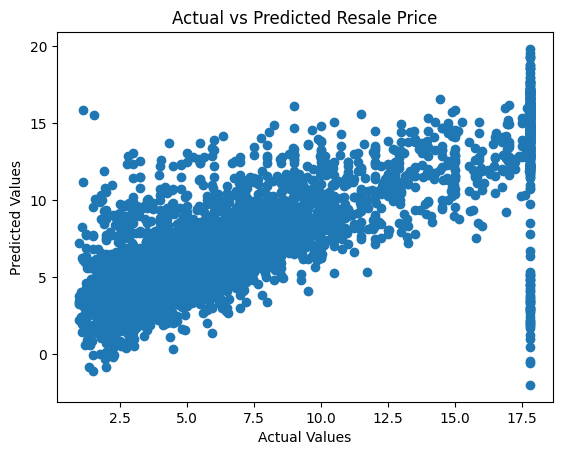

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Resale Price')
plt.show()

<h2>XG Boosting Algorithm</h2>

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import re

df['registered_year'] = df['registered_year'].apply(extract_year)
df = df.replace([np.inf, -np.inf], np.nan)

X = df.drop(['full_name', 'resale_price'], axis=1)
y = df['resale_price']

numeric_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse_value = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error: {rmse_value}")


R-squared Score: 0.8390069669313713
Mean Squared Error: 3.8055953190464447
Mean Absolute Error (MAE): 0.9926818606026263
Root Mean Squared Error: 1.95079351009953


<h2>Sequential Neural Networks Algorithm</h2>

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
file_path = '/content/Jayappa_pp.csv'
data = pd.read_csv(file_path)

In [12]:
X = data.drop(columns=['resale_price'])
y = data['resale_price']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

Numeric Features: ['engine_capacity', 'kms_driven', 'max_power', 'seats', 'mileage']
Categorical Features: ['full_name', 'registered_year', 'insurance', 'transmission_type', 'owner_type', 'fuel_type', 'body_type', 'city']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print(f"Processed Training Data Shape: {X_train.shape}")
print(f"Processed Testing Data Shape: {X_test.shape}")


Processed Training Data Shape: (13956, 6436)
Processed Testing Data Shape: (3490, 6436)


In [14]:
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [16]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 29.8405 - mae: 3.6711 - val_loss: 5.5667 - val_mae: 1.4507
Epoch 2/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 5.3650 - mae: 1.4445 - val_loss: 4.6694 - val_mae: 1.2895
Epoch 3/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 4.6886 - mae: 1.3203 - val_loss: 4.1525 - val_mae: 1.2244
Epoch 4/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 3.3678 - mae: 1.1205 - val_loss: 3.9803 - val_mae: 1.2049
Epoch 5/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 2.8167 - mae: 1.0390 - val_loss: 4.0203 - val_mae: 1.2367
Epoch 6/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 2.3090 - mae: 0.9424 - val_loss: 3.9570 - val_mae: 1.1485
Epoch 7/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 2.0261 - mae: 0.9042 - val_loss: 4.2216 - val_mae: 1.1974
Epoch 8/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 1.8133 - mae: 0.8636 - val_loss: 3.9204 - val_mae: 1.1552
Epoch 9/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 9s 15

In [17]:
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss (MSE): {loss:.4f}")
print(f"Test Mean Absolute Error (MAE): {mae:.4f}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4673 - mae: 1.1591
Test Loss (MSE): 4.3679
Test Mean Absolute Error (MAE): 1.1554


In [18]:
y_pred = model.predict(X_test)

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [19]:
mse_value = mean_squared_error(y_test, y_pred)
rmse_value = np.sqrt(mean_squared_error(y_test, y_pred))
mae_value = mean_absolute_error(y_test, y_pred)
r2_value = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_value:.4f}")
print(f"Root Mean Squared Error: {rmse_value:.4f}")
print(f"Mean Absolute Error (MAE): {mae_value:.4f}")
print(f"R-squared (R2): {r2_value:.4f}")


Mean Squared Error (MSE): 4.3679
Root Mean Squared Error: 2.0899
Mean Absolute Error (MAE): 1.1554
R-squared (R2): 0.8134


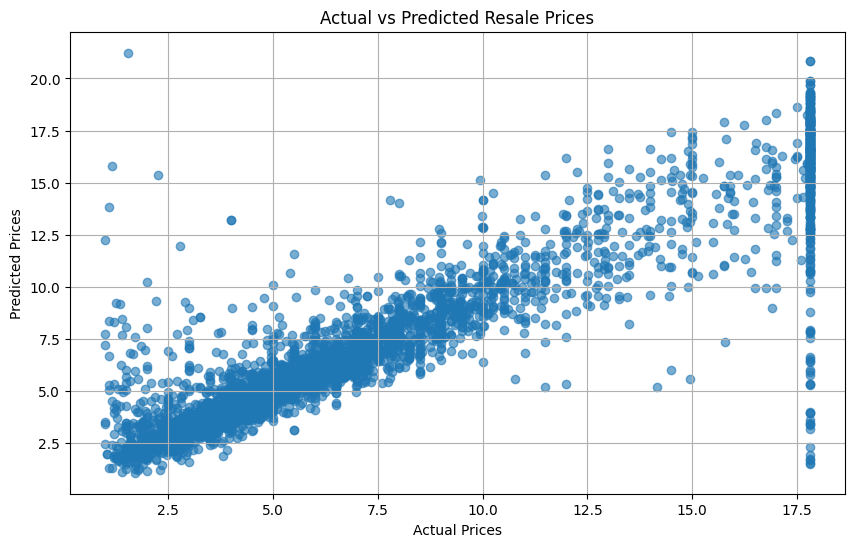

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title("Actual vs Predicted Resale Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid()
plt.show()

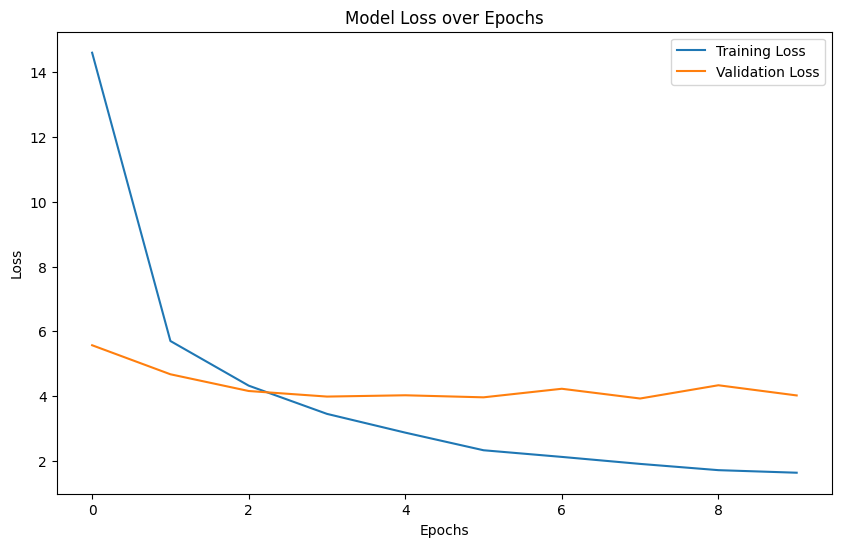

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


<h2>Applying early Pruning</h2>

In [22]:
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=6,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


349/349 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 26.8221 - mae: 3.4303 - val_loss: 5.6421 - val_mae: 1.4740
Epoch 2/6
349/349 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 5.9376 - mae: 1.4963 - val_loss: 4.4728 - val_mae: 1.3042
Epoch 3/6
349/349 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 4.4336 - mae: 1.3023 - val_loss: 4.2036 - val_mae: 1.2229
Epoch 4/6
349/349 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 3.2350 - mae: 1.0997 - val_loss: 4.1003 - val_mae: 1.2157
Epoch 5/6
349/349 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 3.0396 - mae: 1.0872 - val_loss: 4.0392 - val_mae: 1.2076
Epoch 6/6
349/349 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 2.5466 - mae: 0.9959 - val_loss: 4.0287 - val_mae: 1.1837


In [23]:
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss (MSE): {loss:.4f}")
print(f"Test Mean Absolute Error (MAE): {mae:.4f}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.4750 - mae: 1.1937
Test Loss (MSE): 4.5160
Test Mean Absolute Error (MAE): 1.2072


In [24]:
mse_value = mean_squared_error(y_test, y_pred)
rmse_value = np.sqrt(mean_squared_error(y_test, y_pred))
mae_value = mean_absolute_error(y_test, y_pred)
r2_value = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_value:.4f}")
print(f"Root Mean Squared Error: {rmse_value:.4f}")
print(f"Mean Absolute Error (MAE): {mae_value:.4f}")
print(f"R-squared (R2): {r2_value:.4f}")


Mean Squared Error (MSE): 4.3679
Root Mean Squared Error: 2.0899
Mean Absolute Error (MAE): 1.1554
R-squared (R2): 0.8134


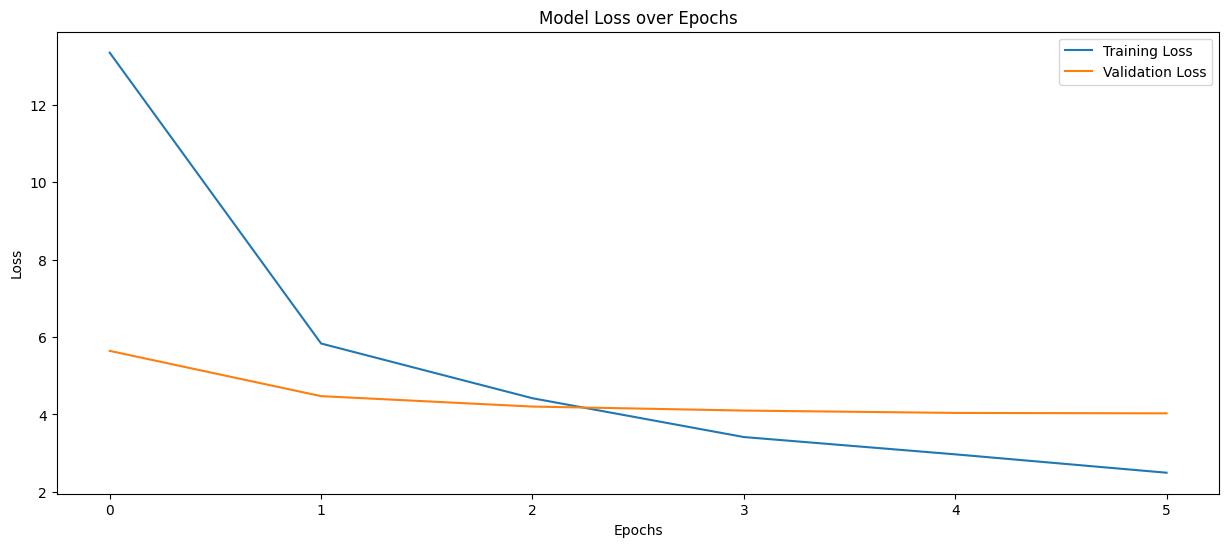

In [25]:
plt.figure(figsize=(15, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()